# Part 2

Perform Market Basket Analysis on the chosen dataset by using Apriori and FP growth algorithms. Can
you express major divergence between these models? Compare and contrast the machine learning results
obtained based on both algorithms

**Business Understanding**

The retailer wants to target customers with suggestions on itemset that a customer is most likely to purchase. The dataset contains data of a retailer; the transaction data provides data about all the transactions that have happened over a period of time. The retailer will use results to the grove in his industry and provide customer suggestions on itemset. The company wants to be able to increase customer engagement and improve customer experience and identify customer behaviour.


**Data Understanding**

BillNo: a 6-digit number assigned to each transaction. Nominal.

Itemname: Product name. Nominal.

Quantity: The quantities of each product per transaction. Numeric.

Date: The day and time when each transaction was generated. Numeric.

Price: Product price. Numeric.

CustomerID: a 5-digit number assigned to each customer. Nominal.

Country: Name of the country where each customer resides. Nominal.

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings


In [ ]:
#reach to the Google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Firstly I would love to describe and explain what is Market Basket Analysis and how I can perform it.

##
Association Discovery

Association discovery is commonly called Market Basket Analysis (MBA). MBA is widely used by grocery stores, banks, and telecommunications among others.

Techniques used to approach the analysis based on probability and statistics. Support, confidence and lift. Those three criteria are important in the evaluation of the algorithm.

**Support.** Level of support show how frequently the combination of items appears in the customer basket.

**Confidence.**  It is the percentage of cases in which a consequent appears given that the antecedent has occurred.

**Lift.** It is a factor by which the likelihood of consequence increases given an antecedent.


**Apriori Algorithm**

The Apriori algorithm is one of the fundamental algorithms in Marketing Basket Analysis(MBA). MBA is an analysis of customers' baskets when they make any purchases. The algorithm aims to identify combinations of items that frequently both together such as milk and bread or milk, bread and eggs. Those items are usually called frequent itemsets. The algorithm is very suitable to work on datasets with a large number of transactions.

Usually, Online transaction processing systems provide the data sources for association discovery. A transaction is a single customer purchase and provides information on what items were bought. Through association discovery, we can identify items that occur together in one record.

**Terminology:**

 k-itemset: the set of k items.

  e.g. {milk, bread, eggs} is a 3-itemset; {cheese} is a 1-itemset; {jam, ice-cream} is a 2-itemset  

  Support: Is simply the number of transactions in which a specific product (or combination of products) occurs. Itemset has support, say, 10% if 10% of the records in the database contain those items.

  Minimum support: The Apriori algorithm starts with a specified minimum level of support.  The algorithm focuses on itemsets which at least this level.

How does the algorithm work?
- It is calculated the support for each individual item
- Deciding the support threshold
- Selecting the frequent item
- Finding support of the frequent item
- Repeat for larger sets
- Generate Association Rules and compute confidence
- Compute lift


**FP Growth Algorithm**

The FP Growth algorithm is improved Apriori’s version. It is faster and more efficient while obtaining the same goal. FP growth algorithm represents the database as a tree called a frequent pattern tree or FP tree.

How does the algorithm work?
- Constructing the FP-tree: It scans the transaction database once to find the frequency of each item. It removes infrequent items, as they do not contribute to frequent patterns and sort the items in DESC order of frequency. Construct the FP-tree by adding each transaction into the tree it also takes into account the item order and the frequencies of the items.

- The next step is to mine the created FP Tree starting with the lowest nodes and their links. These nodes represent single items, and the paths associated with them are called conditional pattern bases. By exploring these paths and combining items, we discover frequent patterns of longer lengths. The conditional pattern base represents the set of prefixes (or paths) in the tree that end with the given frequent item.


- Mining frequent patterns: Repitedly mine the conditional pattern base by performing the same steps all over again. This process continues till all frequent patterns have been discovered


I have a data set
https://www.youtube.com/watch?v=uhxiXOTKzfs


In [ ]:
basket = pd.read_csv("/content/drive/MyDrive/Data Analytics/ML&Data_CA2/Sales.csv")

In [ ]:
basket.head(-10)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522049,581587,CIRCUS PARADE LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France
522050,581587,PLASTERS IN TIN CIRCUS PARADE,12,12/9/2011 12:50,1.65,12680.0,France
522051,581587,PLASTERS IN TIN STRONGMAN,12,12/9/2011 12:50,1.65,12680.0,France
522052,581587,ALARM CLOCK BAKELIKE PINK,4,12/9/2011 12:50,3.75,12680.0,France


## EDA

I will explore data in order to find shapes, datatypes, and missing values. I will apply the visualisation of missing values

In [ ]:
basket.shape

(522064, 7)

In [ ]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  float64
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 27.9+ MB


I have 522064 rows and 6 columns to work

I will use` isna()` and `sum()` in order to find and count missing values.

It is one of the important parts of data preparation. To visualise it I will use missingno library.

In [ ]:
basket.isna().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [ ]:
import missingno as msno

<Axes: >

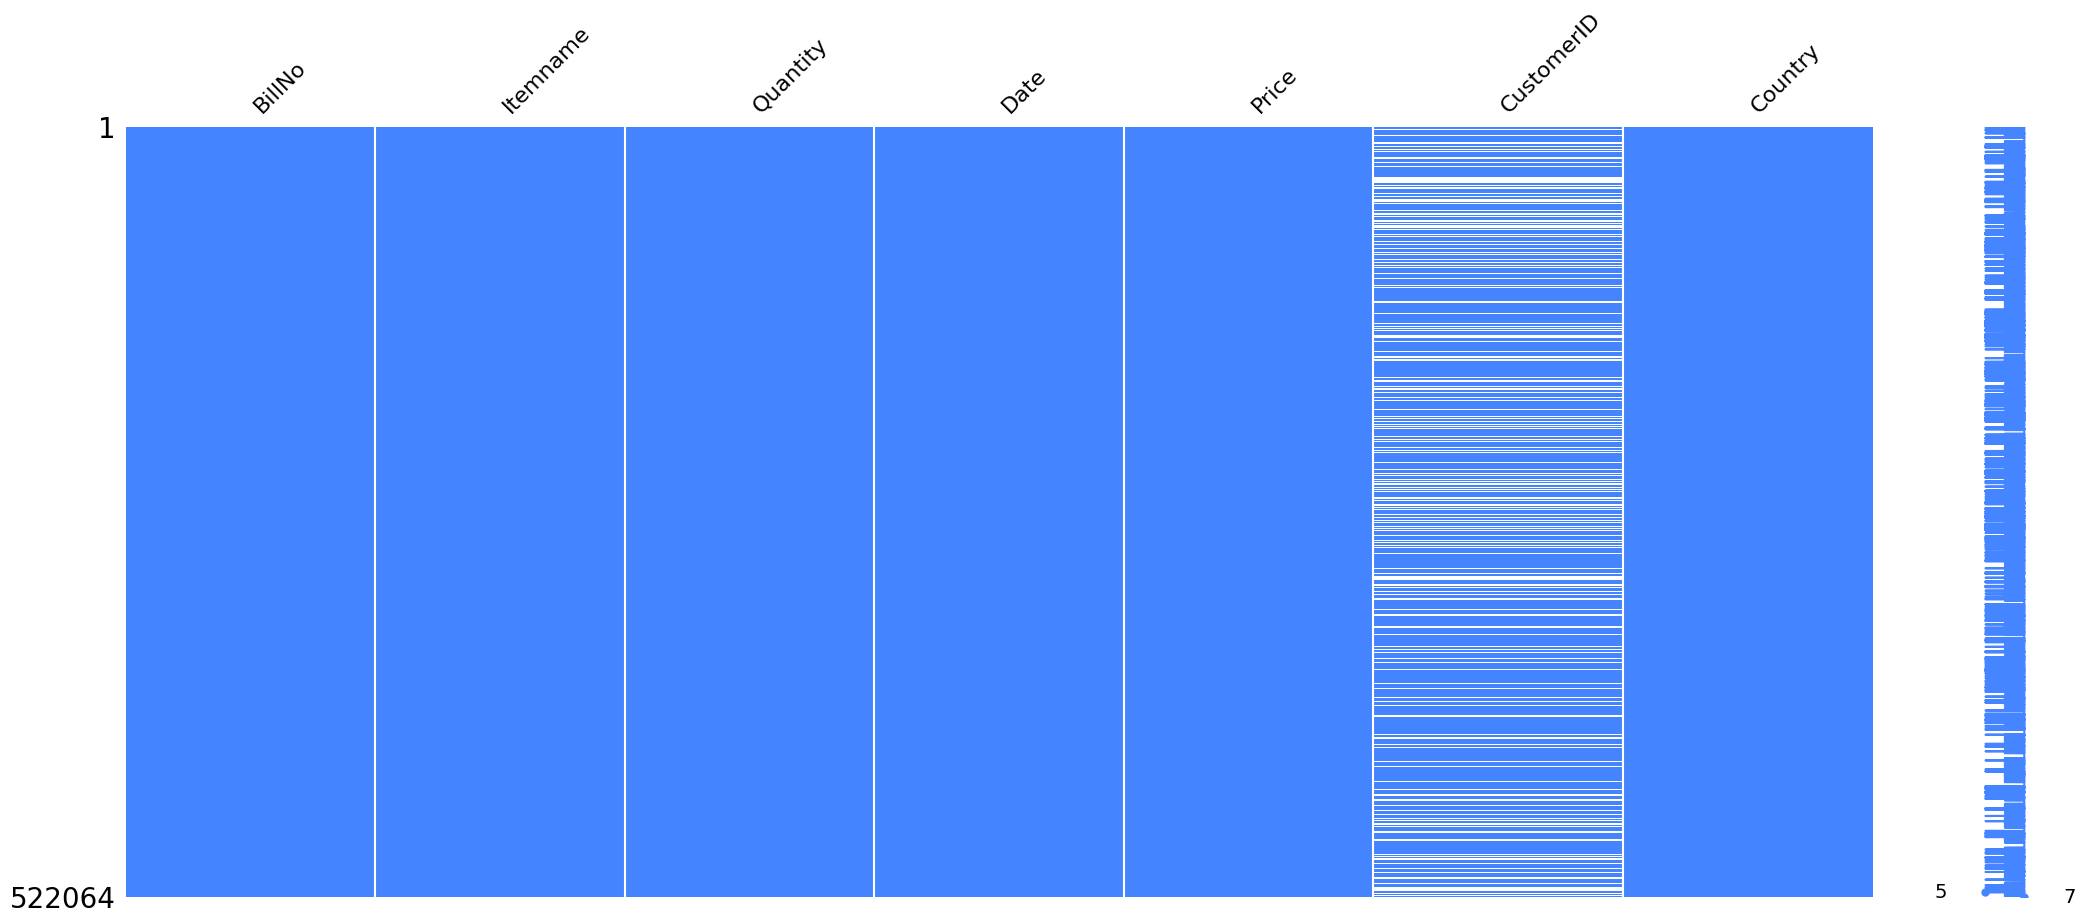

In [ ]:
msno.matrix(basket, color = (0.27, 0.52, 1.0))

In [ ]:
basket.replace(["n.a.","?","NA","n/a", "na", "--"], np.nan, inplace = True)
basket.head(-5)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522054,581587,ALARM CLOCK BAKELIKE GREEN,4,12/9/2011 12:50,3.75,12680.0,France
522055,581587,ALARM CLOCK BAKELIKE IVORY,4,12/9/2011 12:50,3.75,12680.0,France
522056,581587,CHILDRENS APRON SPACEBOY DESIGN,8,12/9/2011 12:50,1.95,12680.0,France
522057,581587,SPACEBOY LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France


I will use `fillna` method to fill in missing values as I work with text data and id. I will display filled values by mimissingno

In [ ]:
basket["Itemname"] = basket["Itemname"].fillna(method="ffill")

In [ ]:
basket["CustomerID"]=basket["CustomerID"].fillna(method="ffill")

In [ ]:
basket.isna().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

<Axes: >

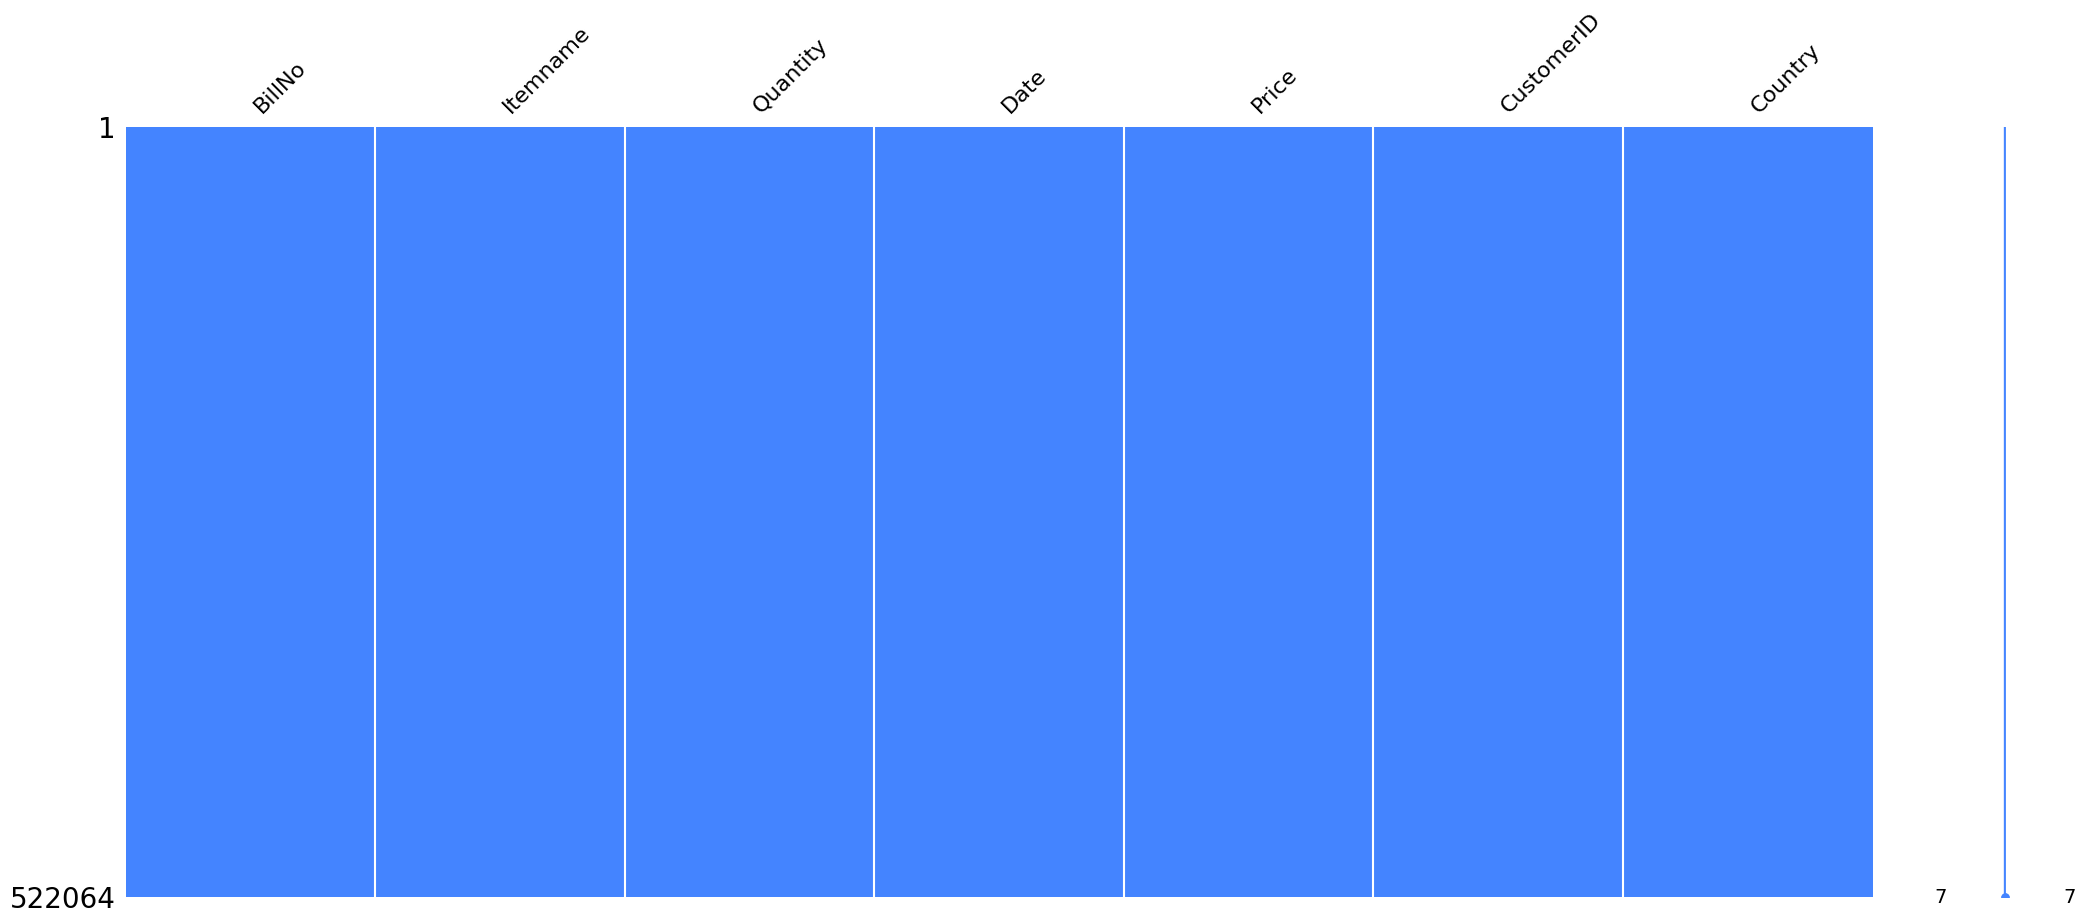

In [ ]:
msno.matrix(basket, color = (0.27, 0.52, 1.0))

In [ ]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    522064 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  float64
 5   CustomerID  522064 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 27.9+ MB


We do not have missing values so I can perform the next step. I will transform data into year and time.

In [ ]:
basket["Date"] = pd.to_datetime(basket["Date"])
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total_Sales
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Visualisation

This dataset is not that big in terms of visualisation. However, we have interesting data insights of multiple features.  I can think about a few of them

*   Sales trend all over the time
*   Number of sales by the country
*   Total and average amount of sale
*   Sales by each year by the country
*   The most popular items


**Countries with high total sales**

I am interested to see which country has the highest amount of sales. It will show which country is a valuable customer for the business.

I will create a column named total sales in order to do that.

In [ ]:
basket['Total_Sales'] = basket.Quantity * basket.Price

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
basket.head(-5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total_Sales
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
522054,581587,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00
522055,581587,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00
522056,581587,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,15.60
522057,581587,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,23.40


I will display what countries we have. I will choose a country in which I will work in ML Modeling.


In [ ]:
basket["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy',
       'Belgium', 'Lithuania', 'Japan', 'Iceland', 'Sweden', 'Austria',
       'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Unspecified', 'Brazil',
       'USA', 'Malta', 'RSA'], dtype=object)

We have a huge amount of data to work and it will be complicated to run the code as it is time-consuming and can be very heavy to proceed in terms of visualisation.

I will specify my visualisation only on the EU countries as we live in Europe and there could be interesting insight and we will know the target better.

I will specify the countries which I would love to consider, group them together and calculate the total amount of sales by each country.

It is general information about sales which is usually required by every company in order to know which region has more sales. This information can be used to identify high-performing markets, allocate resources effectively, and identify potential growth opportunities.

I will use interactive visualisation from plotly library.

**plotly** is a Python graphing library that makes interactive, publication-quality graphs.

I will visualise countries by number of sales and we will be able to what countries has the most sales in the EU. You will be able to manage visualisation by scoring. Whenever you however the country it will show the name and the amount of sales by each country.

I will set the location, and the colour, and specify the title of the visualisation. I will customise the size and position by moving it to the top and centre of the visualisation.

In summary, creating a visualization of the total sales for the specified EU countries is a practical way to analyze sales data effectively. It helps us understand how each region is performing, compare different markets, and use plotly's interactive features to explore and communicate the data in a more engaging manner.


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as offline

In [ ]:
df_eu = pd.DataFrame(basket, columns=['BillNo','Itemname','Country','Date','Quantity', 'Price', 'Total_Sales']) #BillNo	Itemname	Quantity	Date	Price	CustomerID	Country	Total_Price	Total_Sales

#Define EU countries
eu_countries = ['France', 'Netherlands', 'Germany', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium', 'Lithuania', 'Sweden', 'Austria', 'Greece']

# Add country group column
df_eu['Country_Group'] = df_eu['Country'].apply(lambda x: 'EU' if x in eu_countries else None)

# Exclude non-EU countries
df_eu = df_eu[df_eu['Country_Group'] == 'EU']

# Display the grouped DataFrame
df_eu




,BillNo,Itemname,Country,Date,Quantity,Price,Total_Sales,Country_Group
26,536370,ALARM CLOCK BAKELIKE PINK,France,2010-12-01 08:45:00,24,3.75,90.00,EU
27,536370,ALARM CLOCK BAKELIKE RED,France,2010-12-01 08:45:00,24,3.75,90.00,EU
28,536370,ALARM CLOCK BAKELIKE GREEN,France,2010-12-01 08:45:00,12,3.75,45.00,EU
29,536370,PANDA AND BUNNIES STICKER SHEET,France,2010-12-01 08:45:00,12,0.85,10.20,EU
30,536370,STARS GIFT TAPE,France,2010-12-01 08:45:00,24,0.65,15.60,EU
...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,France,2011-12-09 12:50:00,12,0.85,10.20,EU
522060,581587,CHILDREN'S APRON DOLLY GIRL,France,2011-12-09 12:50:00,6,2.10,12.60,EU
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,France,2011-12-09 12:50:00,4,4.15,16.60,EU
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,France,2011-12-09 12:50:00,4,4.15,16.60,EU


In [ ]:
df_sales_count = df_eu.groupby('Country')['Total_Sales'].sum().reset_index()

# Display the grouped DataFrame
print(df_sales_count)

        Country  Total_Sales
0       Austria     10198.68
1       Belgium     41196.34
2        France    209715.11
3       Germany    228867.14
4        Greece      4760.52
5         Italy     17483.24
6     Lithuania      1661.06
7   Netherlands    285446.34
8        Poland      7334.65
9      Portugal     33747.10
10        Spain     61577.11
11       Sweden     38378.33


In [ ]:
import plotly.graph_objects as go

df_grouped = df_sales_count.groupby('Country')['Total_Sales'].sum().reset_index()

# Create the choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=df_sales_count['Country'],
    z=df_sales_count['Total_Sales'],
    locationmode='country names',
    colorscale='Blues',
    colorbar_title='Total Sales'
))

## Customize the map layout
fig.update_layout(
    title={
        'text': 'Total Sales by Country',
        'x': 0.5,  # Set the x-position to center the title
        'y': 0.9,  # Adjust the y-position as desired
        'xanchor': 'center',  # Set the x-anchor to center the title
        'yanchor': 'top',  # Set the y-anchor to position the title from the top
        'font': {'size': 24}  # Set the font size of the title
         },
    geo_scope='europe'
)

# Show the figure
fig.show()

From the visualization, it is clear that the Netherlands has the highest sales, followed by Germany and France. The other countries show significantly lower sales.

Knowing whether the sales trend is positive or negative is important for businesses. It helps predict future sales and guides the development of effective sales and marketing strategies. By analyzing sales trends, companies can make informed decisions to adapt and succeed in the market.

I would love to build another type of visualisation called a panel. This type of visualisation also allows us to build an attractive dashboard and specify metrics.

The panel is an open-source library for python which can be installed in order to build powerful and interactive dashboards.

I will consider the total amount of sales and average sales by country in the time line. We will be able to see the trend of sales all over time by each month by the country

Analysing the sales trend through total sales and average sales over time helps us understand how sales fluctuate and evolve month by month. It reveals patterns, seasonality, and overall growth or decline in sales, providing insights into market dynamics, consumer behaviour, and sales strategy effectiveness. Visualising the trend allows us to predict future sales patterns, adjust marketing efforts, allocate resources efficiently and identify opportunities.

I will group the total sales of the countries and find the average sales. The functions such as `groupby()` and transform('mean') will be used.


I will install panel, ipywidgets and holoviews.

I will create an interactive table with sliders for months, and buttons for total sales and average sales.

In [ ]:
# Calculate the average price and include the 'Date' column
df_eu['Average_Sales'] = df_eu.groupby('Country')['Total_Sales'].transform('mean')

# Print the DataFrame with the additional 'Average_Price' column
df_eu

,BillNo,Itemname,Country,Date,Quantity,Price,Total_Sales,Country_Group,Average_Sales
26,536370,ALARM CLOCK BAKELIKE PINK,France,2010-12-01 08:45:00,24,3.75,90.00,EU,24.94233
27,536370,ALARM CLOCK BAKELIKE RED,France,2010-12-01 08:45:00,24,3.75,90.00,EU,24.94233
28,536370,ALARM CLOCK BAKELIKE GREEN,France,2010-12-01 08:45:00,12,3.75,45.00,EU,24.94233
29,536370,PANDA AND BUNNIES STICKER SHEET,France,2010-12-01 08:45:00,12,0.85,10.20,EU,24.94233
30,536370,STARS GIFT TAPE,France,2010-12-01 08:45:00,24,0.65,15.60,EU,24.94233
...,...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,France,2011-12-09 12:50:00,12,0.85,10.20,EU,24.94233
522060,581587,CHILDREN'S APRON DOLLY GIRL,France,2011-12-09 12:50:00,6,2.10,12.60,EU,24.94233
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,France,2011-12-09 12:50:00,4,4.15,16.60,EU,24.94233
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,France,2011-12-09 12:50:00,4,4.15,16.60,EU,24.94233


In [ ]:
!pip install panel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_eu['Date'] = pd.to_datetime(df_eu['Date'])

In [ ]:
df_eu

,BillNo,Itemname,Country,Date,Quantity,Price,Total_Sales,Country_Group,Average_Sales
26,536370,ALARM CLOCK BAKELIKE PINK,France,2010-12-01 08:45:00,24,3.75,90.00,EU,24.94233
27,536370,ALARM CLOCK BAKELIKE RED,France,2010-12-01 08:45:00,24,3.75,90.00,EU,24.94233
28,536370,ALARM CLOCK BAKELIKE GREEN,France,2010-12-01 08:45:00,12,3.75,45.00,EU,24.94233
29,536370,PANDA AND BUNNIES STICKER SHEET,France,2010-12-01 08:45:00,12,0.85,10.20,EU,24.94233
30,536370,STARS GIFT TAPE,France,2010-12-01 08:45:00,24,0.65,15.60,EU,24.94233
...,...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,France,2011-12-09 12:50:00,12,0.85,10.20,EU,24.94233
522060,581587,CHILDREN'S APRON DOLLY GIRL,France,2011-12-09 12:50:00,6,2.10,12.60,EU,24.94233
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,France,2011-12-09 12:50:00,4,4.15,16.60,EU,24.94233
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,France,2011-12-09 12:50:00,4,4.15,16.60,EU,24.94233


In [ ]:
import panel as pn
pn.extension('tabulator')

In [ ]:
from ipywidgets import interact

In [ ]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas


In [ ]:
!pip install holoviews hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 70.2 MB/s eta 0:00:00


In [ ]:
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')


Output hidden; open in https://colab.research.google.com to view.

In [ ]:

pn.extension()

# Assuming you have the DataFrame 'df_eu' available

# Create an interactive table using the DataFrame widget
idf_eu = pn.widgets.DataFrame(df_eu)

# Display the interactive table
idf_eu

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Define Panel widgets
start_date = pd.to_datetime('2010-01-01')
end_date = pd.to_datetime('2011-12-31')
num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month) + 1

month_slider = pn.widgets.IntSlider(name='Month slider', start=1, end=num_months, step=1, value=1)
month_slider

IntSlider(end=24, name='Month slider', start=1, value=1)

I have the interactive table and slider ready for the next step.
I will set buttons for total sales and average sales.

By moving the slider you will be able to specify the moth that you need. In addition, you will be able to choose the country that you would love to see.

In [ ]:

yaxis_sales = pn.widgets.RadioButtonGroup(
    name='Y axis',
    options=['Total_Sales', 'Average_Sales',],
    button_type='success'
)

In [ ]:

# Apply filters and aggregation
countries = ['Austria', 'Belgium', 'France', 'Germany', 'Greece', 'Italy',
             'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Spain', 'Sweden']

# Get the DataFrame value from the widget
df_eu = idf_eu.value

# Filter and aggregate the data
sales_pipeline = (
    df_eu[
        (df_eu['Date'].dt.month <= month_slider.value) &
        (df_eu['Country'].isin(countries))
    ]
    .groupby(['Country', 'Date'])[yaxis_sales.value].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='Date')
    .reset_index(drop=True)
)

In [ ]:
sales_pipeline

,Country,Date,Total_Sales
0,Sweden,2011-01-04 14:20:00,42.120000
1,France,2011-01-05 12:42:00,16.355000
2,France,2011-01-05 14:48:00,20.877750
3,France,2011-01-06 14:26:00,14.535000
4,France,2011-01-06 16:12:00,19.968750
...,...,...,...
83,France,2011-01-31 09:57:00,69.009348
84,Germany,2011-01-31 11:46:00,26.170476
85,Germany,2011-01-31 13:27:00,20.196000
86,Netherlands,2011-01-31 14:35:00,14.942222


In [ ]:
sales_plot = sales_pipeline.hvplot( x = 'Date', by='Country', y=yaxis_sales,line_width=2, title="Sales by the countries")
sales_plot

ParamFunction(function, _pane=HoloViews)

I built the visualisation based on the data. The visualisation of total sales provides meaningful data. We can see what days there were more sales by each country. By exploring and visualizing the sales patterns specific to each year. We will be able to identify any yearly trends or anomalies that might affect our understanding of sales performance. This approach will provide valuable insights into how sales vary over time and help us gain a deeper understanding of our sales performance

However, the average sales did not perform well. It presents a straight line of the data. I also would love to represent information on how each year is deferred by sales. I will apply interactive visualisation in order to see that.

**Total sales by each year comparison**

Comparing total sales by each year is important for businesses as it helps evaluate performance, identify trends, set goals, understand competition and benchmark against industry standards. It provides insights into sales growth or decline, guides decision-making, and set strategic planning for long-term success. By analysing these comparisons, businesses can make informed decisions.

I will use the `plotly express` library to create a bar chart. The chart will represent the 'Total_Sales' for each 'Country' and is colour-coded by 'Year'. The layout of the chart is customised to display a title with an increased font size. Each year will be coloured.

I will use a chart as it will be very clear to see the difference between the two years and it will provide info about the countries required.  By setting the 'x' parameter of the title to 0.5, the chart title is horizontally centred within the layout. Increasing the font size to 24 improves the readability and visibility of the title.

You will be able to see the information by hovering the charts.

In [ ]:
# Extract year from the Date column
df_eu['Year'] = pd.to_datetime(df_eu['Date']).dt.year


# Group and aggregate the data by Country and Year
sales_by_country_year = df_eu.groupby(['Country', 'Year'])['Total_Sales'].sum().reset_index()
color_map = {2010: 'blue', 2011: 'red', 2012: 'green'}

# Create a bar chart with one bar for each country and split by year
fig = px.bar(sales_by_country_year, x='Country', y='Total_Sales', color='Year',
             color_discrete_map=color_map, title='Sales by Country by Each Year')

# Update the layout of the figure
fig.update_layout(
    title={
        'text': 'Sales by Country by Each Year',
        'x': 0.5,  # Set the x-coordinate to 0.5 for center alignment
        'font': {'size': 24}  # Increase the font size of the title
    }
)

# Show the interactive plot
fig.show()



The graph shows a significant difference between 2010 and 2011. The difference in sales performance across countries suggests that market dynamics vary during that period. Factors such as economic conditions, consumer behaviour, industry trends, and specific events occurring in those years can influence sales outcomes. Some countries such as Austria, Greece and Poland. even just came to the market and might be experiencing potential growth in the future.

In [ ]:
#!pip install dash
#!pip install jupyter-dash

**The most frequent items by Country**

As we are working on a recommendation system will be very logical to visualise products that are represented and sales to the customers. Through visualisation of the most frequent items bought by customers in each country, we can understand their preferences and buying patterns. This information guides recommendation algorithms to suggest similar or complementary items, enhancing the relevance of recommendations. We can also identify upselling and cross-selling opportunities. Recommending higher-priced or related items to customers based on their previous purchases or popular products in their country can boost sales and enhance customer satisfaction.

I will create interactive visualisation using plotly library.
It will represent the total count of items, names of the items, and what countries where the items are the most popular.

I will use a bar chart representation in order to show the outcome. You can choose all the countries in the EU or you can choose a particular country of your choice.  By the visualisation we will see what item can frequently appear, what it the most popular item amoung all the countries and each one and total count of items. The information  will be helpfull for furder sales and narketing startegy.

I set layout:
title and axis a bit bigger and place it in the moddle of the board. Set barmode='stack'. I will take as colorshame as one of the mosllty used. Orientation will be horisontal as it will beter represntation of the features by axise.

 I also need to drop "POSTAGE" in order to clean the data. Before ML application in any case. I will do it in this step in order to provide clear visualisation of the items.


In [ ]:
df_eu["Itemname"].value_counts()

POSTAGE                               960
ROUND SNACK BOXES SET OF4 WOODLAND    264
PLASTERS IN TIN WOODLAND ANIMALS      181
REGENCY CAKESTAND 3 TIER              171
ROUND SNACK BOXES SET OF 4 FRUITS     167
                                     ... 
MISELTOE HEART WREATH WHITE             1
MISELTOE HEART WREATH                   1
FOLDING MIRROR HOT PINK                 1
CHARLOTTE BAG ALPHABET  DESIGN          1
HANGING JAM JAR T-LIGHT HOLDERS         1
Name: Itemname, Length: 2444, dtype: int64

In [ ]:
df_eu = df_eu[df_eu['Itemname'] != 'POSTAGE']

In [ ]:
# Group the data by 'Country', 'Itemname', and count the occurrences
grouped_data = df_eu.groupby(['Country', 'Itemname']).size().reset_index(name='Count')

# Sort the data by count in descending order
sorted_data = grouped_data.sort_values('Count', ascending=False)

# Get the top 5 items with the highest count for each country
top_items_by_country = sorted_data.groupby('Country').head(5)

# Create a list of colors for each item
colors = ['rgba(31, 119, 180, 0.8)', 'rgba(255, 127, 14, 0.8)', 'rgba(44, 160, 44, 0.8)', 'rgba(214, 39, 40, 0.8)', 'rgba(148, 103, 189, 0.8)']

# Create a list to store the bar traces for each country
bar_traces = []

# Iterate over each country
for country in top_items_by_country['Country'].unique():
    country_data = top_items_by_country[top_items_by_country['Country'] == country]

    # Create a bar trace for the country
    bar_trace = go.Bar(
        x=country_data['Count'],
        y=country_data['Itemname'],
        name=country,
        orientation='h',
        marker=dict(color=colors[:len(country_data)]),
    )

    # Append the bar trace to the list
    bar_traces.append(bar_trace)

# Create the layout for the bar chart
layout = go.Layout(
    title=dict(text='Top Items by Country', x=0.5, y=0.95, font=dict(size=24)),
    xaxis=dict(title='Count'),
    yaxis=dict(title='Item Name'),
    barmode='stack',
)

# Create the figure with the bar traces and layout
fig = go.Figure(data=bar_traces, layout=layout)

# Show the figure
fig.show()



This data-driven approach helps businesses identify popular items, manage inventory effectively, create targeted marketing campaigns, and capitalize on growth opportunities. With the insights gained from this visualization, businesses can make informed decisions that lead to success and improve customer experiences.

I set a view nole for the main countries such Netherlands, France and Germany as they are the top countries on the market. I would love to take data from one of the countries in order to perform the ML algorithms. They have a good amount of data for performance. It will be more convenient for me to perform the analysis and experiment with the settings.


In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 81.6 MB/s eta 0:00:00


After analysing the insights obtained from the visualisation, it would be beneficial to run the algorithm on a country-specific basis. By splitting the regions, we can get a better understanding of each country's market performance. We can identify the items that are frequently purchased by customers. Another benefit of this approach is that the algorithm will be able to perform faster.

## Apriori Algorithm

I will do the last cleaning before applying the algorithm.

I will use `str.strip()` function to strip the whitespace, `dropna() drops the rows from the DataFrame where the 'BillNo' column if it has values (NaN). astype('str') will convert the values in the 'BillNo' column to string data type. If 'BillNo' column contains the letter 'C'. It uses the str.contains() function to check if the values in the column contain the specified pattern ('C' in this case). The ~ operator is used to negate the condition. It selects rows where the condition is False

In [ ]:
# Remove any whote spaces or specified characters at the start and end of a string.
basket['Itemname'] = basket['Itemname'].str.strip()

# Drop NA values from the column 'BillNo'
basket.dropna(axis = 0, subset = ['BillNo'], inplace = True)

# astype is a Pandas function for DataFrames (and numpy for numpy arrays) that will cast the object to the specified type
basket['BillNo'] = basket['BillNo'].astype('str')

# Returns true if the characters exist and false if not.
basket = basket[~basket['BillNo'].str.contains('C')]

basket.head(-5)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total_Sales
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
522054,581587,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00
522055,581587,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00
522056,581587,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,15.60
522057,581587,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,23.40


In order to perform the ML Algorithm I will set 0 and 1 values for items if they are in transaction or not.

I can perform the algorithm with all items in the data frame. However, it will be time-consuming to work with this large amount of data.


I will work with columns Itemname, BillNum, Country and Quantity. It will calculate the number of items in each transaction including the quantity of items by country.

I will also reset the index into BillNo. It is one of the steps that has to be taken to work wi the data.


In [ ]:
basket_MBA = (basket[basket['Country'] == "Germany"]
          .groupby(['BillNo', 'Itemname'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BillNo'))

basket_MBA

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
BillNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I will apply one hot encoding technique in order to perform the ML modelling. It is a commonly used technique for converting categories into numbers.

In addition, I will drop columns which contain 'POSTAGE', I will perform it in order to clean the data.

The function checks if the value x is less than or equal to 0. If it is, the function returns 0.

if x >= 1: return 1:  if the value x is greater than or equal to 1. If it is, the function returns 1.



In [ ]:
def encode_units(x):
  if x <= 0:
      return 0
  if x >= 1:
      return 1
basket_MBA_sets = basket_MBA.applymap(encode_units)

basket_MBA_sets.drop('POSTAGE', inplace = True, axis = 1)
basket_MBA_sets

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
BillNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I have the data frame that can be used for ML Applications. I will import the association_rules algorithm and the apriori algorithm.

Hyperparameters:

min_suppotr, min_threshold, lift and confidence - I will experiment in order to fine the optimal number of rules, threshold, lift and confidence.


In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Support**

In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets= apriori(basket_MBA_sets, min_support = 0.05, use_colnames = True)
ap = frequent_itemsets.sort_values(by = "support", ascending = False)
print(ap)

     support                                           itemsets
35  0.245077               (ROUND SNACK BOXES SET OF4 WOODLAND)
34  0.157549                (ROUND SNACK BOXES SET OF 4 FRUITS)
24  0.137856                 (PLASTERS IN TIN WOODLAND ANIMALS)
31  0.137856                         (REGENCY CAKESTAND 3 TIER)
56  0.131291  (ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNAC...
48  0.126915                           (WOODLAND CHARLOTTE BAG)
21  0.115974                    (PLASTERS IN TIN CIRCUS PARADE)
22  0.107221                         (PLASTERS IN TIN SPACEBOY)
0   0.102845                           (6 RIBBONS RUSTIC CHARM)
44  0.102845                               (SPACEBOY LUNCH BOX)
12  0.100656                       (JUMBO BAG WOODLAND ANIMALS)
30  0.096280                    (RED TOADSTOOL LED NIGHT LIGHT)
9   0.091904                           (JAM MAKING SET PRINTED)
20  0.085339                  (PACK OF 72 RETROSPOT CAKE CASES)
46  0.078775                (STRAWBERRY 

In [ ]:
ap.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(59, 2)

I applied a wide range min_support from 0.1 to 0.8. It gave me different outcomes at the end of each iteration.

I decided to keep min_support = 0.05. Itit gives 59 rules for the performance which is enough to build the associations.

This decision was made by trying different min_support values and seeing how many rules were generated at each iteration. I wanted to find a value that would give a good number of rules without making them too few or too many. I believe this is a good balance between having enough rules to work with and ensuring they are meaningful and useful for the analysis

In [ ]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 0.8)
rules.sort_values(by = "confidence", ascending = False)
#rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746
12,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540
15,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.102845,0.245077,0.070022,0.680851,2.778116,0.044817,2.365427
1,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
7,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670
8,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006
13,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509
16,(WOODLAND CHARLOTTE BAG),(ROUND SNACK BOXES SET OF4 WOODLAND),0.126915,0.245077,0.063457,0.500000,2.040179,0.032354,1.509847
0,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.137856,0.115974,0.067834,0.492063,4.242887,0.051846,1.740427
4,(PLASTERS IN TIN CIRCUS PARADE),(ROUND SNACK BOXES SET OF4 WOODLAND),0.115974,0.245077,0.056893,0.490566,2.001685,0.028470,1.481887


In [ ]:
rules[(rules['lift'] >= 5) &
       (rules['confidence'] >= 0.8)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.84375,6.648168,0.050194,5.587746


I set min_threshold = 0.8 as it gives good performance after my experimentation. The choice of min_threshold, confidence, and lift values affects the number and quality of the generated rules. For example, a higher min_threshold may result in fewer rules but with higher confidence levels, indicating stronger associations between items.

Through experimentation with the data. I set high parameters for lift and confidence. It provides a high level of confidence that if the user bu the first item he/she is more likely to buy the second item or another set of items. In addition, it will provide a strong association of the items.

Confidence = 80%

Lift = 5

In [ ]:
sorted_rules = rules.sort_values(by='confidence', ascending=False)

filtered_rules = sorted_rules[(sorted_rules['lift'] >= 5) & (sorted_rules['confidence'] >= 0.8)]

filtered_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.84375,6.648168,0.050194,5.587746


I have 1 item after performing the model. There are only items which have very high confidence and high lift. The values project a significantly strong positive association between the antecedent and consequent in the association rule.

In [ ]:
print(basket_MBA["RED RETROSPOT CHARLOTTE BAG"].sum())
print(basket_MBA["WOODLAND CHARLOTTE BAG"].sum())


570.0
1020.0


 ## FP-growth algorithm

In [ ]:
!pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.7 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
# Evaluate the frequent item rules for fpgrowth function
from mlxtend.frequent_patterns.fpgrowth import fpgrowth

FP_frequent_itemsets = fpgrowth(basket_MBA_sets, min_support = 0.04, use_colnames = True)

fp = FP_frequent_itemsets.sort_values(by = "support", ascending = False)

print(fp)

     support                                           itemsets
10  0.245077               (ROUND SNACK BOXES SET OF4 WOODLAND)
11  0.157549                (ROUND SNACK BOXES SET OF 4 FRUITS)
27  0.137856                 (PLASTERS IN TIN WOODLAND ANIMALS)
12  0.137856                         (REGENCY CAKESTAND 3 TIER)
84  0.131291  (ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNAC...
..       ...                                                ...
65  0.041575                     (SET OF 4 PANTRY JELLY MOULDS)
26  0.041575               (3 PIECE SPACEBOY COOKIE CUTTER SET)
25  0.041575                    (CHILDRENS APRON APPLES DESIGN)
82  0.041575  (REGENCY CAKESTAND 3 TIER, 6 RIBBONS RUSTIC CH...
75  0.041575                          (SPACEBOY CHILDRENS BOWL)

[103 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [ ]:
FP_rules = association_rules(FP_frequent_itemsets, metric = "confidence", min_threshold = 0.8)

FP_rules.sort_values(by = "confidence", ascending = False)
print("FP_frequent_itemsets")

FP_frequent_itemsets


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
FP_rules[(FP_rules['lift'] >= 5) &
       (FP_rules['confidence'] >= 0.8)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746
4,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.052516,0.056893,0.045952,0.875000,15.379808,0.042964,7.544858
5,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.056893,0.052516,0.045952,0.807692,15.379808,0.042964,4.926915


I applied two algorithms with different number metrics of support. As I have a huge amount of data to perform I decided to set it from 0.01 to 1.

I had a challenging time working on it as it gave me different results in an outcome. If I generate fewer rules I got only a few items passing through the filter of lift and confidence. If I generated more rules I got more items What is good in cases of research and understanding of customers' behaviour as it is better to have more observation.  In the case of working on the dataset for businesses desition making it is better to have straightforward rules. So I set support to Apriory = 0.05 and FP = 0.04, filtering I made the same in order to see which items will be able to pass through the filtering.


Items RED RETROSPOT CHARLOTTE BAG (antecedents) and	WOODLAND CHARLOTTE(consequents) BAG have high support, confidence and lift. We can say that the item can have a high % to be recommended. FP algorithm generated more items with high lift and confidence which also have % to be recommended. SET/6 RED SPOTTY PAPER CUPS (antecedents)	and SET/6 RED SPOTTY PAPER PLATES (consequents).

The performance and setting of the algorithms depend on business goals. The metrics can be set differently. In terms of algorithm comparison, they both performed well and they gave good results.

The result of the algorithms represented below





In [ ]:

# Generate frequent itemsets using apriori algorithm
ap_frequent_itemsets = apriori(basket_MBA_sets, min_support=0.05, use_colnames=True)
ap_sorted_itemsets = ap_frequent_itemsets.sort_values(by="support", ascending=False)


# Generate frequent itemsets using fpgrowth algorithm
fp_frequent_itemsets = fpgrowth(basket_MBA_sets, min_support=0.04, use_colnames=True)
fp_sorted_itemsets = fp_frequent_itemsets.sort_values(by="support", ascending=False)

# Reorder the columns to bring high confidence feature on top
comparison_table = pd.DataFrame({
    'High Confidence (Apriory_rules)': rules_filtered['confidence'].fillna(0),
    'Lift (Apriory_rules)': rules_filtered['lift'].fillna(0),
    'High Confidence (FP_rules)': fp_filtered['confidence'].fillna(0),
    'Lift (FP_rules)': fp_filtered['lift'].fillna(0)
})


# Display the comparison table
comparison_table


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,High Confidence (Apriory_rules),Lift (Apriory_rules),High Confidence (FP_rules),Lift (FP_rules)
2,NaN,NaN,0.843750,6.648168
4,NaN,NaN,0.875000,15.379808
5,NaN,NaN,0.807692,15.379808
11,0.84375,6.648168,NaN,NaN


In [ ]:
rules_filtered = rules[(rules['lift'] >= 5) & (rules['confidence'] >= 0.8)]
fp_filtered = FP_rules[(FP_rules['lift'] >= 5) & (FP_rules['confidence'] >= 0.8)]


# Reorder the columns to bring high confidence feature on top
comparison_table = pd.DataFrame({
    'High Confidence (Apriory_rules)': rules_filtered['confidence'].fillna(0),
    'Lift (Apriory_rules)': rules_filtered['lift'].fillna(0),
    'High Confidence (FP_rules)': fp_filtered['confidence'].fillna(0),
    'Lift (FP_rules)': fp_filtered['lift'].fillna(0)
})



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from tabulate import tabulate

support_ariori = 0.3
support_fp = 0.4
num_rules_ariori = 59
num_rules_fp = 103
threshold = 0.8

table_data = [
    ["Apriori Algorithm", support_ariori, num_rules_ariori, threshold],
    ["FP-Growth Algorithm", support_fp, num_rules_fp, threshold]
]

table_headers = ["Algorithm", "Support", "Number of Rules", "Threshold"]

table = tabulate(table_data, headers=table_headers, tablefmt="grid")

print(table)
comparison_table

+---------------------+-----------+-------------------+-------------+
| Algorithm           |   Support |   Number of Rules |   Threshold |
+=====================+===========+===================+=============+
| Apriori Algorithm   |       0.3 |                59 |         0.8 |
+---------------------+-----------+-------------------+-------------+
| FP-Growth Algorithm |       0.4 |               103 |         0.8 |
+---------------------+-----------+-------------------+-------------+


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,High Confidence (Apriory_rules),Lift (Apriory_rules),High Confidence (FP_rules),Lift (FP_rules)
2,NaN,NaN,0.843750,6.648168
4,NaN,NaN,0.875000,15.379808
5,NaN,NaN,0.807692,15.379808
11,0.84375,6.648168,NaN,NaN


There is not much difference between algorithms in terms of support. Both algorithms are useful in this case. However, the outcomes depend on the data we work with. The fact that both algorithms produce the same support values for frequent itemsets could indicate that the itemsets have similar levels of significance or occurrence in the dataset. I experimented with support in order to find a difference. I believe FP works very well with huge amounts of data. And recognise them well. However, it's important to note that the algorithms may still be different in terms of their performance and efficiency. In this case, I set different rules to perform the algorithms. And many parameters can change the performance.


# Conclusion:

I performed data cleaning and engineered a few variables. I visualised business insight related to sales over time, among the countries, and the frequency of the products in the EU countries. I applied an interactive dashboard in order to make visualisation more interactive, efficient and user-friendly orientated by using panel, plotly and extensions.  I gained a few business insights from the data in order to perform the ML models. I Performed ML implementation of 2 Machine Learning models and hyperparameters such as support, lift and confidence.  Compared the models and describe my funding. Based on my founding I can say that the algorithms are useful for particular businesses and tasks. They provide recommendations (antecedents	and consequents) with high lift and confidence. Which says that the item can be recommended to the user.

# Reference List:

- Analytics Vidhya. (2021). A Comprehensive Guide on Market Basket Analysis. [Online] Available at: https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-market-basket-analysis/#Market_Basket_Analysis_From_the_Customers%E2%80%99_Perspective [Accessed 19 May 2023].

- David McQuaid (2021). Interactive Visualization of Geographical
Data [PDF file]. Data Visualisation course at CCT College [Accessed 24 May 2023]

- Plotly. (n.d.). Python. [Online] Available at: https://plotly.com/python/ [Accessed 23 May 2023].

- Select Statistics. (n.d.). Market Basket Analysis: Understanding Customer Behaviour. [Online] Available at: https://select-statistics.co.uk/blog/market-basket-analysis-understanding-customer-behaviour/ [Accessed 19 May 2023].

- Sharma, R. (2021). The Apriori Algorithm. Towards Data Science. [Online] Available at: https://towardsdatascience.com/the-apriori-algorithm-5da3db9aea95 [Accessed 20 May 2023].

- Software Testing Help. (n.d.). FP-Growth Algorithm in Data Mining. [Online] Available at: https://www.softwaretestinghelp.com/fp-growth-algorithm-data-mining/ [Accessed 21 May 2023].

- Statistics Help. (n.d.). Panel. [Online] Available at: https://pypi.org/project/panel/ [Accessed 23 May 2023].

- Tiwari, A. (2021). Apriori Algorithm for Association Rule Learning: How to Find Clear Links Between Transactions. Towards Data Science. [Online] Available at: https://towardsdatascience.com/apriori-algorithm-for-association-rule-learning-how-to-find-clear-links-between-transactions-bf7ebc22cf0a [Accessed 23May 2023].

- Velez, J. (2021). Association Discovery: The Apriori Algorithm. Towards AI. [Online] Available at: https://pub.towardsai.net/association-discovery-the-apriori-algorithm-28c1e71e0f04 [Accessed 23 May 2023].

- Data School. (2016). Machine Learning Recipes with Josh Gordon: Association Rules and the Apriori Algorithm. [Online] Available at: https://www.youtube.com/watch?v=uhxiXOTKzfs [Accessed 26 May 2023].

- Derek Banas. (2013). Machine Learning Tutorial: The Apriori Algorithm. [Online] Available at: https://www.youtube.com/watch?v=guVvtZ7ZClw [Accessed 20 May 2023].

- StatQuest with Josh Starmer. (2018). Frequent Pattern Mining - Association Rules, Episode 1. [Online] Available at: https://www.youtube.com/watch?v=GM8nrVBFdFo&t=316s [Accessed 23 May 2023].


- Sophia Yang. (2022). Visualization and Interactive Dashboard in Python: My favorite Python Viz tools — HoloViz. [Online] Available at: https://www.youtube.com/watch?v=wlzkiGPIV3I

